File and Data Field Descriptions
- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

        PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

        HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

        CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

        Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

        Destination - The planet the passenger will be debarking to.

        Age - The age of the passenger.

        VIP - Whether the passenger has paid for special VIP service during the voyage.

        RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

        Name - The first and last names of the passenger.
        
        Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set(style='white')


In [2]:
CMAP = ['#003f5c', '#ffa600', '#444e86', '#955196', '#dd5182', '#ff6e54']

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# EDA & Feature Engineering

First, we shall look to understand the data.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [8]:
train.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [9]:
test.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


<li>Some missing values in all of the columns except for 'PassengerId' and 'Transported'.</li>
<li>Expenditure columns ('FoodCourt', 'ShoppingMall', etc.) are probably right skewed seeing that the max values are far above the 75th percentile. </li>
<li>Earth is the most common 'HomePlanet'.</li>
<li>TRAPPIST-1e is the most common 'Destination'.</li>
<li>Only around 200 passengers are in VIPs. </li>
<li>Statistics description are more or less similar in both training and test data.</li>



### Missing Values

In [10]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Look like every single feature column has missing values. Are they missing together or are they missing exclusively?

First, we'll take a look at how much data would we lose if we simply drop all the missing values.

In [11]:
len(train.dropna(axis=0))

6606

We'll be missing out on about 25% (about 2,000 rows) of the data by dropping all the NaN values indiscriminately. We need to impute the missing data to preserve information. 

In [12]:
null_homeplanet = train[train.HomePlanet.isnull()]
null_homeplanet.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         2
Cabin             6
Destination       4
Age               2
VIP               3
RoomService       6
FoodCourt         2
ShoppingMall      7
Spa               3
VRDeck            1
Name              7
Transported       0
dtype: int64

In [13]:
null_homeplanet.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,199.000000,195.000000,199.000000,194.000000,198.000000,200.00000
mean,28.793970,202.789744,262.638191,141.742268,231.762626,284.91500
std,14.483455,444.926731,709.517135,578.257312,1057.962364,889.41508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,38.000000,20.500000,25.000000,16.250000,19.750000,60.50000
max,74.000000,2083.000000,4387.000000,7104.000000,11001.000000,7121.00000


In [14]:
null_homeplanet.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,201,0,199,195,197,198,194
unique,201,0,2,193,3,2,194
top,0064_02,NaN,False,F/1411/S,TRAPPIST-1e,False,Colatz Keen
freq,1,NaN,124,2,150,193,1


<li>missing values are pretty much exclusive based on the 'HomePlanet' column.</li>
<li> They appear to be randomly missing but is this true across all columns?</li?>

<br><br>
I want to visualize all the missing values in a table/dataframe to see if the missing values are exclusive for each column.

In [15]:
columns = train.columns

# create a list of df containing only null values for each column
null_dfs = [train[train[col].isnull()] for col in columns]

# create another list that shows the total number of missing values for each column
nullsum_dfs = [df.isnull().sum() for df in null_dfs]

# combine them into a dataframe, cutting out PassengerId and Transported
nullsum_combine = pd.DataFrame(index=train.columns[1:-1], columns=columns[1:-1], data=nullsum_dfs[1:-1])


In [16]:
nullsum_combine.style.background_gradient(cmap='cividis')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
HomePlanet,201,2,6,4,2,3,6,2,7,3,1,7
CryoSleep,2,217,7,4,1,7,2,3,8,5,7,10
Cabin,6,7,199,4,4,6,4,5,2,2,4,2
Destination,4,4,4,182,3,4,3,6,5,3,2,4
Age,2,1,4,3,179,6,1,4,4,1,4,3
VIP,3,7,6,4,6,203,4,4,4,2,1,1
RoomService,6,2,4,3,1,4,181,2,4,3,2,1
FoodCourt,2,3,5,6,4,4,2,183,2,5,6,5
ShoppingMall,7,8,2,5,4,4,4,2,208,2,6,4
Spa,3,5,2,3,1,2,3,5,2,183,3,6


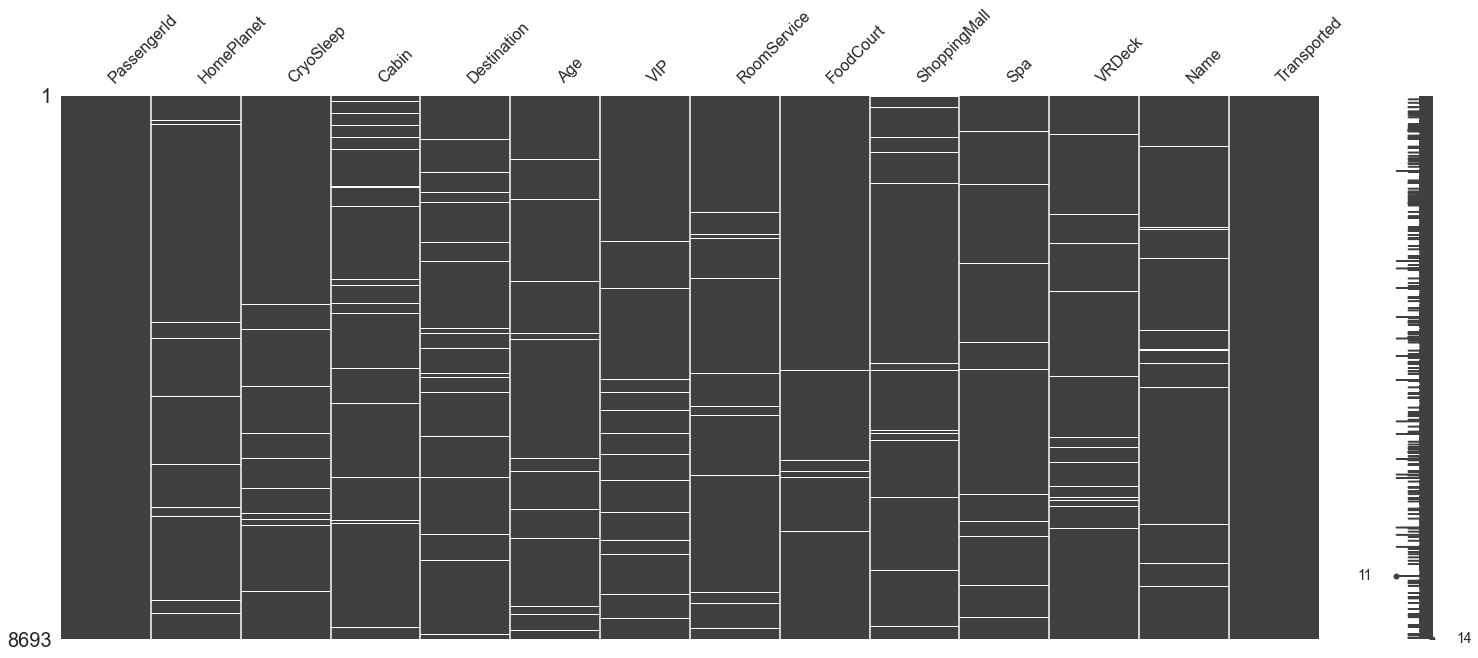

In [17]:
# visualize the missing values
msno.matrix(train);

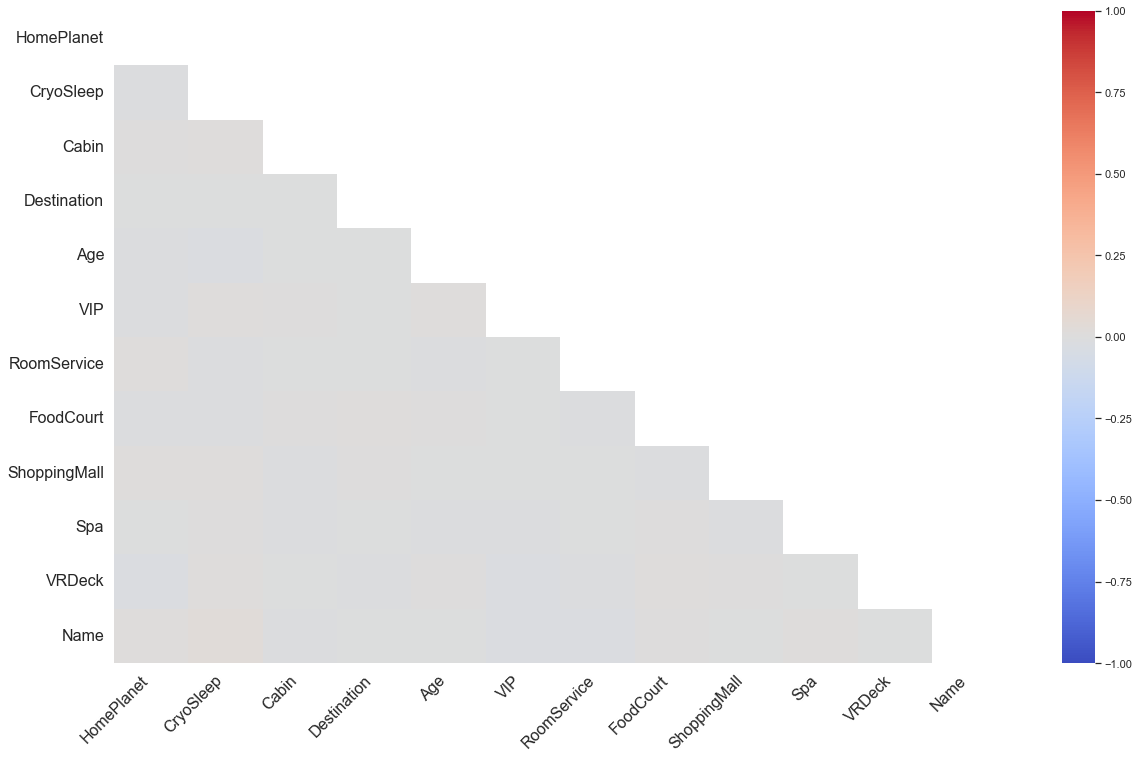

In [18]:
# see how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(train, cmap='coolwarm');

The rows of the DataFrame above show how many missing values there are for that column name.
The columns represents a DataFrame that has all the missing values present for the respective column name. 

In essence, we are looking to see if the missing values overlap a lot between columns. And it appears that they are more or less exclusive from each other which is represented by the diagonal of larger numbers. 
<li>The matrix of missing values also show similar thing. </li>
<li>The heatmap confirms that there's little to no correlation between missing variables. It could be concluded that the data is Missing Completely At Random (MCAR) or at least Missing At Random (MAR).</li>
<li>It's probably safe to impute the missing data as they are likely to be MCAR or MAR.</li>
<br>
Before we impute the missing data, we must first understand the relationship between features and see if we can make an educated guess as to what to impute them with.

## Numerical Features

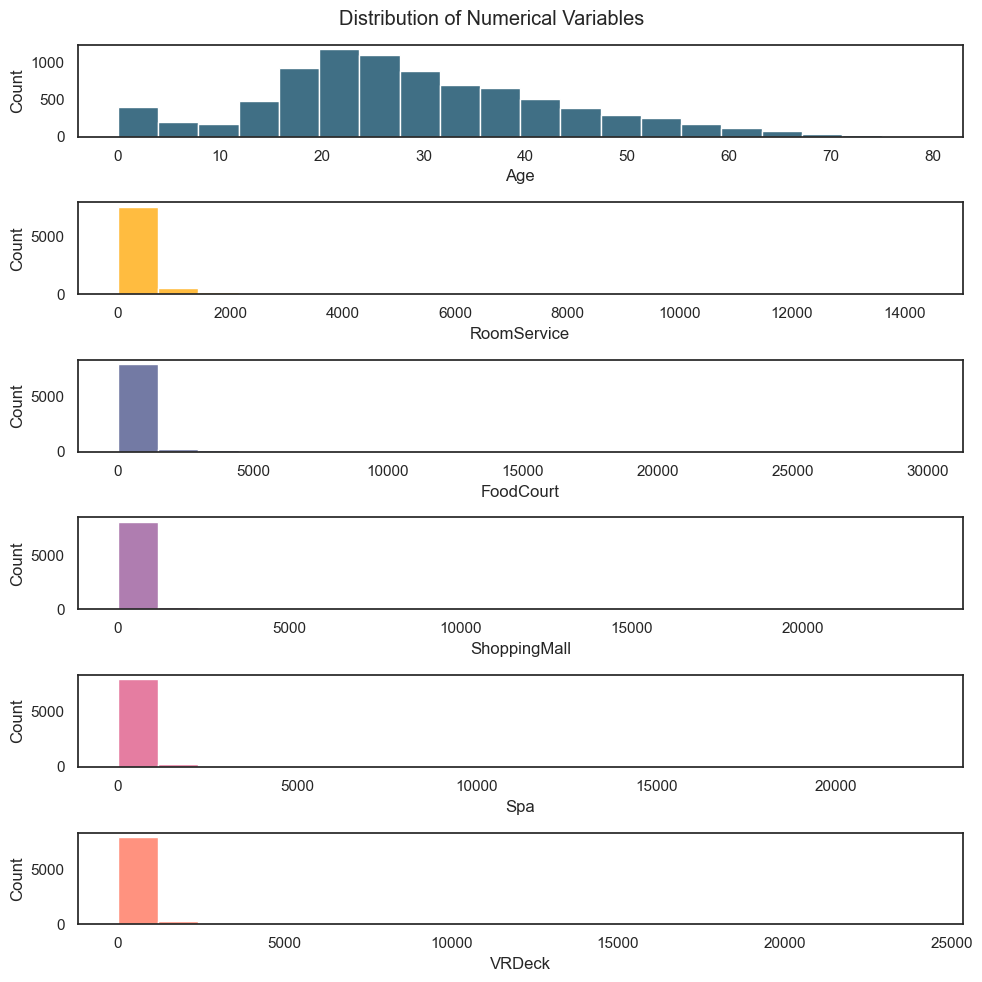

In [19]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, ax = plt.subplots(figsize=(10,10), dpi=100, nrows=6)

fig.suptitle('Distribution of Numerical Variables')

for i, col in enumerate(num_cols):
    sns.histplot(data=train, x=col, ax=ax[i], bins=20, color=CMAP[i])

fig.tight_layout() 
    

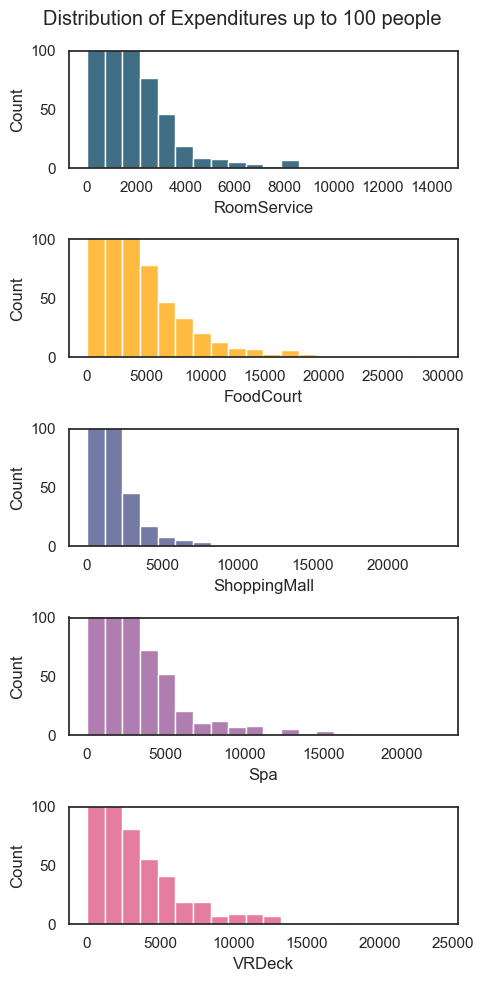

In [20]:
# zoom in the distribution
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, ax = plt.subplots(figsize=(5,10), dpi=100, nrows=5)
fig.suptitle('Distribution of Expenditures up to 100 people')

for i, col in enumerate(spend_cols):
    sns.histplot(data=train, x=col,ax=ax[i], bins=20, color=CMAP[i])
    ax[i].set_ylim(0,100)

fig.tight_layout()
    

In [21]:
# see how many people not spend any money on any of the services/entertainment
zero_spend = train.query('RoomService==0 and FoodCourt==0 and ShoppingMall==0 and Spa==0 and VRDeck==0')
zero_spend['PassengerId'].count()

3247

We could make two new features here, total spending on luxury amenities and a binary variable to see if they spent any money or not.

In [22]:
luxury_amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train['LuxurySpend'] = train[luxury_amenities].sum(axis=1)
train['ZeroSpend'] = (train['LuxurySpend']==0)

# do the same for test data
test['LuxurySpend'] = test[luxury_amenities].sum(axis=1)
test['ZeroSpend'] = (test['LuxurySpend']==0)

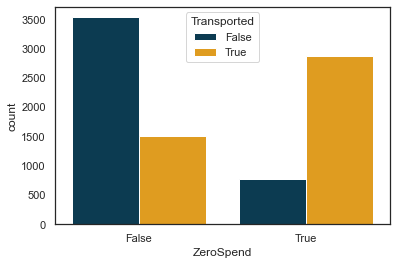

In [23]:
sns.countplot(data=train, x='ZeroSpend', hue='Transported', palette=CMAP);

<li>The 'Age' of the passengers are right-skewed, most of the passengers are in their 20s. We could impute the missing values for 'Age' with the median.</li>

<li>There are many "outliers" for the luxury spending in this dataset. But they are not outliers, it is the distribution of the data. </li>
<li>Most people do not spend any money on the luxury amenities.</li>
<li>People with no spending on luxury amenities are more likely to be transported.</li>

## Categorical Features

It seems reasonable to simply impute these columns with mode. However, before we commit. We should probably inspect them first. Maybe we can find some patterns that could help us make a more informed imputation.

### Passenger Id

From the data description, the passenger ids are written in a gggg_pp form with gggg denoting the group and pp the passenger's number within the group. This column can be splitted to two to extract the information. Since it's one of two columns that has no missing values, it can be useful for imputation.

In [24]:
train[['PassengerGroup', 'PassengerGroupNumber']] = train['PassengerId'].str.split('_', expand=True)

test[['PassengerGroup', 'PassengerGroupNumber']] = test['PassengerId'].str.split('_', expand=True)

Get the size of the group by counting the occurence of every element in PassengerGroup. There are many ways to do this but I like this approach cause it's fast compared to apply with value_counts(). 

In [25]:
from collections import Counter

train_group_counter = np.vectorize(Counter(train.PassengerGroup).get)
train['GroupSize'] = train_group_counter(train.PassengerGroup)

test_group_counter = np.vectorize(Counter(test.PassengerGroup).get)
test['GroupSize'] = test_group_counter(test.PassengerGroup)

In [26]:
# convert column to int
train['PassengerGroup'] = train['PassengerGroup'].astype(int)

test['PassengerGroup'] = test['PassengerGroup'].astype(int)

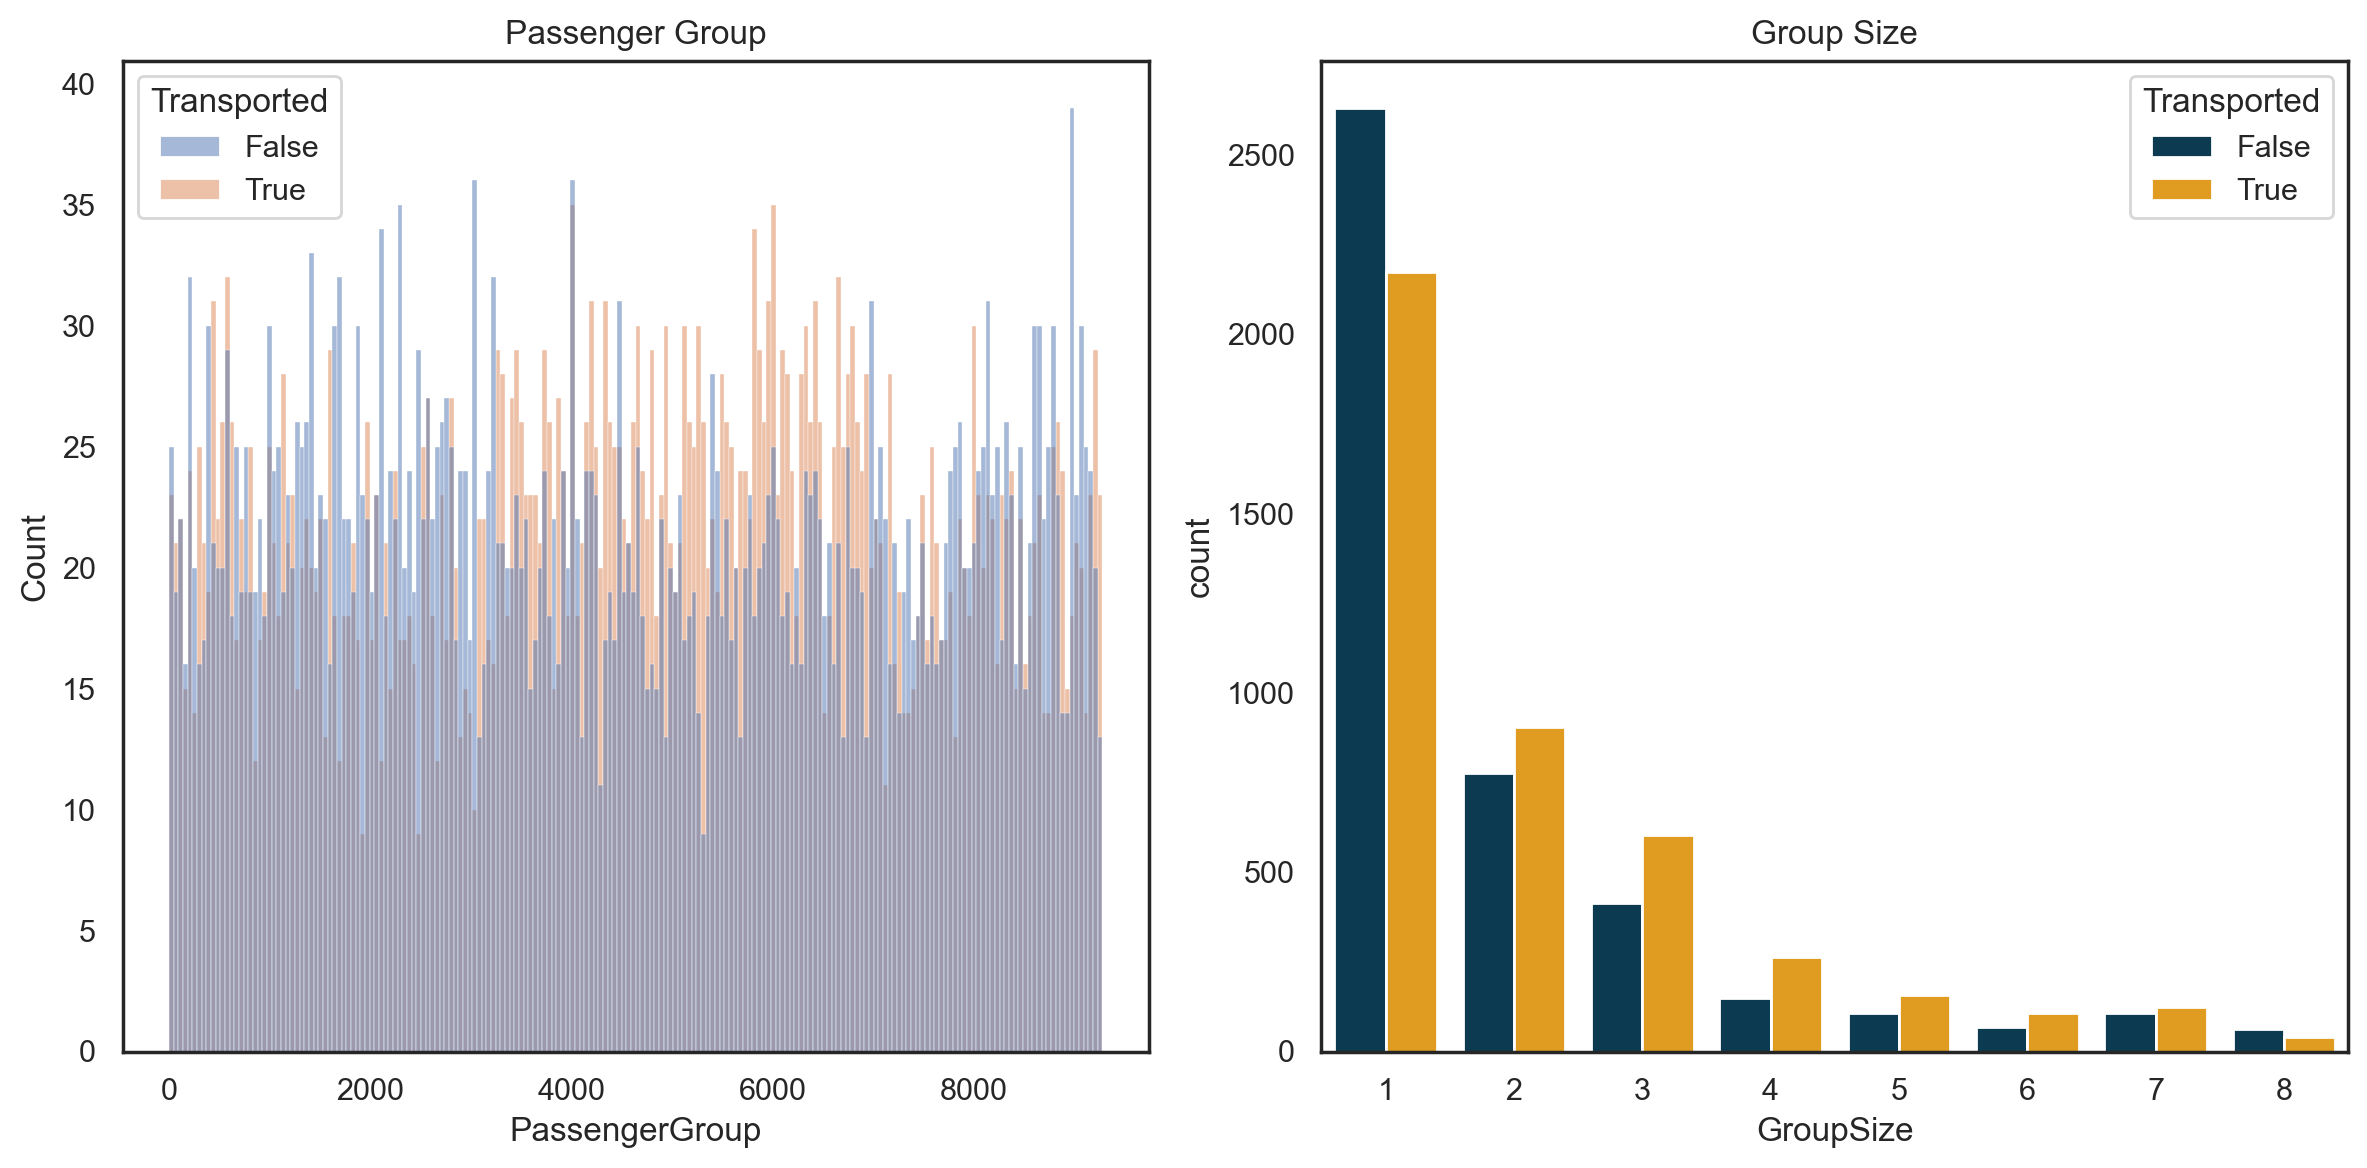

In [27]:
# plot new features
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=200)

sns.histplot(data=train, x='PassengerGroup', hue='Transported', ax=ax[0], bins=200)
ax[0].set_title('Passenger Group')

sns.countplot(data=train, x='GroupSize', hue='Transported', ax=ax[1], palette=CMAP)
ax[1].set_title('Group Size')

fig.tight_layout()
plt.show()


<li>Not much information can be extracted from Passenger Group by itself. There are simply too many unique values for it to be useful as a feature.</li>
<li>Group Size on the other hand, shows something interesting. It appears that people travelling alone are less likely to be transported.</li>

In [28]:
# create new feature, True if alone, False if not.
train['Alone'] = (train['GroupSize']==1)

test['Alone'] = (test['GroupSize']==1)

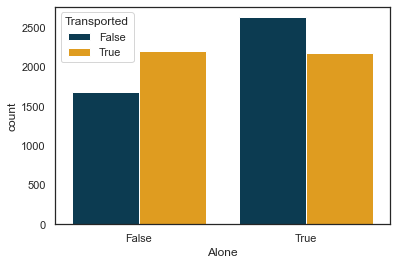

In [29]:
sns.countplot(data=train, x='Alone', hue='Transported', palette=CMAP);

### Cabin

The Cabin column has a Deck/Num/Side formatting to it. Separate them into three columns to extract its information.

In [30]:
train[['CabinDeck', 'CabinNum', 'CabinSide']] = train['Cabin'].str.split('/', expand=True)

test[['CabinDeck', 'CabinNum', 'CabinSide']] = test['Cabin'].str.split('/', expand=True)

In [31]:
# convert cabin num to integer while preserving the nan values
train['CabinNum']= [int(num) if num is not np.nan else num for num in train.CabinNum]

test['CabinNum']= [int(num) if num is not np.nan else num for num in test.CabinNum]

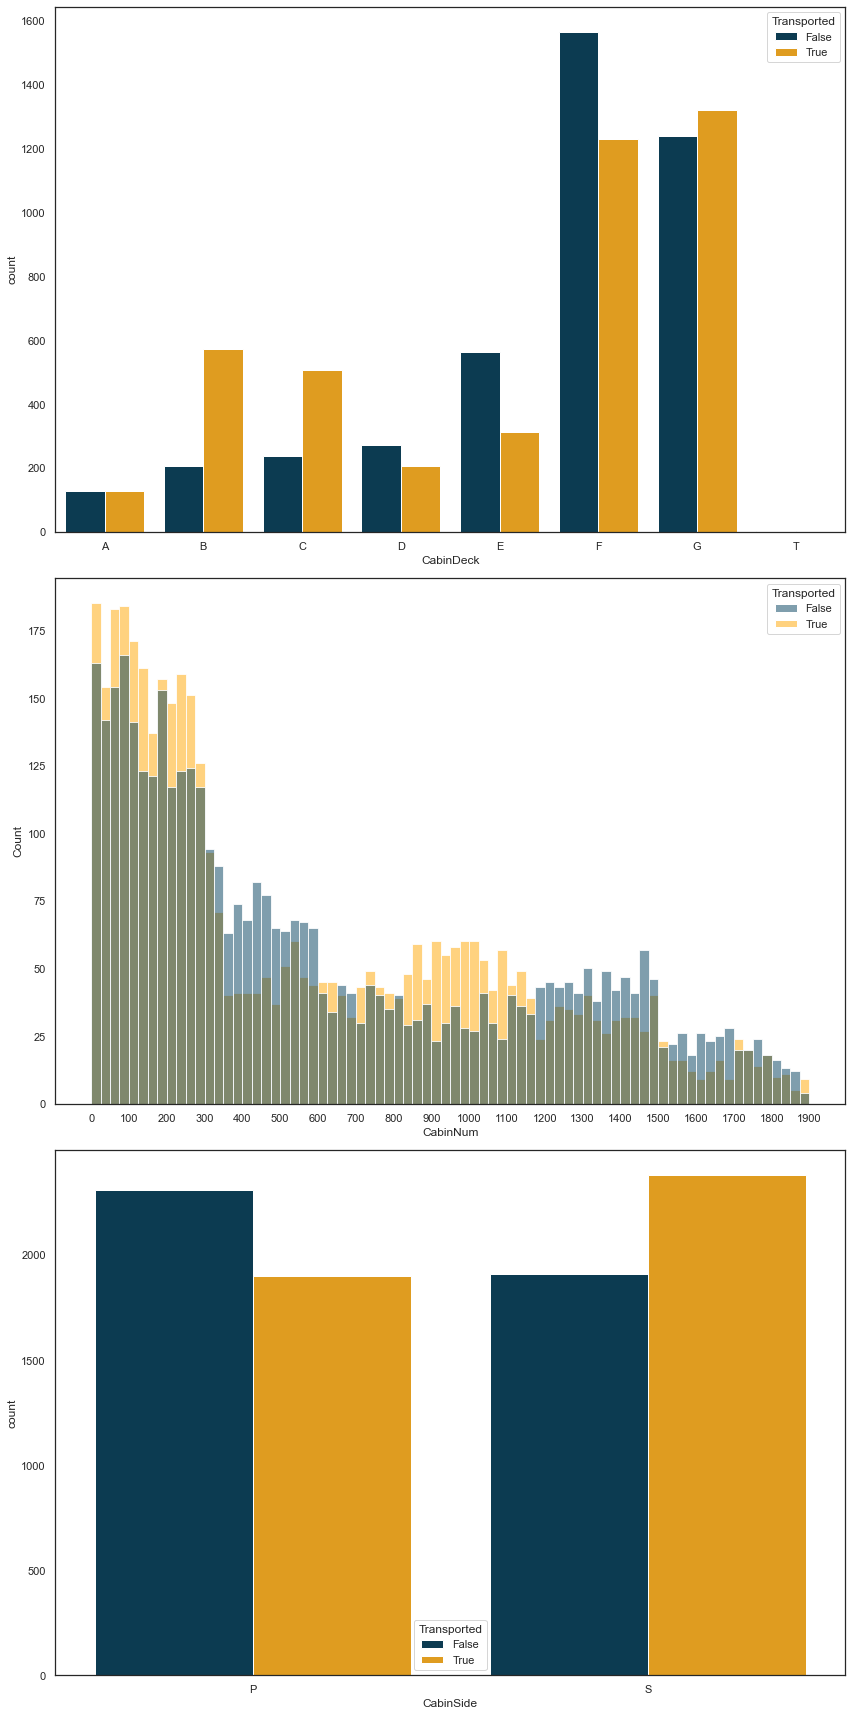

In [32]:
fig, axes = plt.subplots(figsize=(12, 24), nrows=3, ncols=1)
deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
# cabin deck
sns.countplot(data=train, x='CabinDeck', hue='Transported', ax=axes[0], order=deck_order, palette=CMAP[:2])

# cabin num
sns.histplot(data=train, x='CabinNum', binwidth=25, hue='Transported', ax=axes[1], palette=CMAP[:2])
axes[1].set_xticks(range(0, 2000, 100))
# cabin side
sns.countplot(data=train, x='CabinSide', hue='Transported', ax=axes[2], palette=CMAP[:2])

fig.tight_layout()
plt.show()

<li>Most people stay in Deck F or G.</li>
<li>There are 5 distinct groups based on the cabin numbers. We can see how the count fluctuates in a pattern between Transported and not Transported.</li>
<li>Passengers on the starboard side (S) are more likely to be transported.</li>

#### Cabin Deck

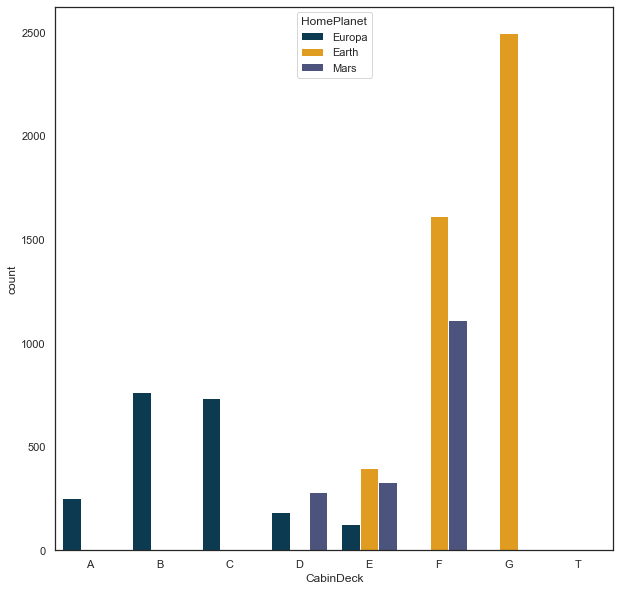

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(data=train, x='CabinDeck', order=deck_order, palette=CMAP, hue='HomePlanet');

In [34]:
# see the graph in numbers
pd.crosstab(train['HomePlanet'], train['CabinDeck']).style.background_gradient(cmap='cividis')

CabinDeck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,0,0,0,0,395,1614,2498,0
Europa,252,766,734,186,128,0,0,4
Mars,0,0,0,282,330,1110,0,0


In [35]:
train[train['CabinDeck']=='T']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,LuxurySpend,ZeroSpend,PassengerGroup,PassengerGroupNumber,GroupSize,Alone,CabinDeck,CabinNum,CabinSide
1004,1071_01,NaN,False,T/0/P,TRAPPIST-1e,35.0,False,415.0,1328.0,0.0,...,False,1817.0,False,1071,01,1,True,T,0.0,P
2254,2414_01,Europa,False,T/1/P,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,...,False,7411.0,False,2414,01,1,True,T,1.0,P
2734,2935_01,Europa,False,T/2/P,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,...,False,7412.0,False,2935,01,1,True,T,2.0,P
2763,2971_01,Europa,False,T/3/P,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,...,True,3164.0,False,2971,01,1,True,T,3.0,P
4565,4863_01,Europa,NaN,T/2/S,TRAPPIST-1e,37.0,False,1721.0,667.0,NaN,...,False,3778.0,False,4863,01,1,True,T,2.0,S


<li>Deck A, B, C, and T are all from Europa.</li>
<li>Deck D, E, and F are a mixture or two or three HomePlanet.</li>
<li>People from Earth are only in Deck E, F, or G.</li>
<li>Deck G only has passengers from Earth.</li>
<li>Deck T is a small deck with only a few people</li>

#### Cabin Number

There are five discernable group based on 'CabinNum' and 'Transported. 
Here are the rough grouping:
<li>Group 1: Cabin number 0-300</li>
<li>Group 2: Cabin number 300-600</li>
<li>Group 3: Cabin number 600-1200</li>
<li>Group 4: Cabin number 1200-1500</li>
<li>Group 5: Cabin number >1500</li>


In [36]:
train.loc[train.CabinNum <= 300, 'CabinGroup'] = 'Group 1'
train.loc[(300 < train.CabinNum) & (train.CabinNum <= 600), 'CabinGroup'] = 'Group 2'
train.loc[(600 < train.CabinNum) & (train.CabinNum <= 1200), 'CabinGroup'] = 'Group 3'
train.loc[(1200 < train.CabinNum) & (train.CabinNum <= 1500), 'CabinGroup'] = 'Group 4'
train.loc[train.CabinNum > 1500, 'CabinGroup'] = 'Group 5'

# repeat for test data
test.loc[test.CabinNum <= 300, 'CabinGroup'] = 'Group 1'
test.loc[(300 < test.CabinNum) & (test.CabinNum <= 600), 'CabinGroup'] = 'Group 2'
test.loc[(600 < test.CabinNum) & (test.CabinNum <= 1200), 'CabinGroup'] = 'Group 3'
test.loc[(1200 < test.CabinNum) & (test.CabinNum <= 1500), 'CabinGroup'] = 'Group 4'
test.loc[test.CabinNum > 1500, 'CabinGroup'] = 'Group 5'


In [37]:
train.CabinGroup.value_counts()

Group 1    3569
Group 3    1967
Group 2    1484
Group 4     937
Group 5     537
Name: CabinGroup, dtype: int64

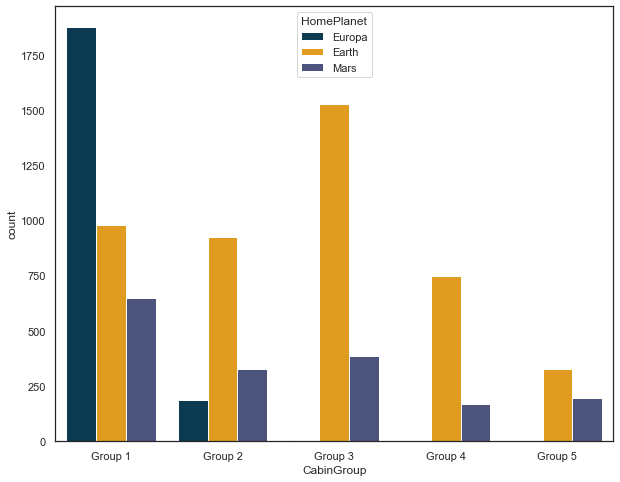

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(data=train, x='CabinGroup', hue='HomePlanet', palette=CMAP);

In [39]:
pd.crosstab(train['HomePlanet'], train['CabinGroup']).style.background_gradient(cmap='cividis')

CabinGroup,Group 1,Group 2,Group 3,Group 4,Group 5
HomePlanet,,,,,
Earth,979,927,1526,749,326
Europa,1876,188,6,0,0
Mars,647,327,387,167,194


<li>Most people in Group 1 are from Europa</li>
<li>The rest of the group are predominantly from Earth</li>

### Name

Extract the last name. We'll assume that passengers with the same last name are family/related.

In [40]:
train['LastName'] = train['Name'].str.split().str[-1]
test['LastName'] = test['Name'].str.split().str[-1]

train_counter = np.vectorize(Counter(train['LastName']).get)
train['FamilySize'] = train_counter(train['LastName'])

test_counter = np.vectorize(Counter(test['LastName']).get)
test['FamilySize'] = test_counter(test['LastName'])

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,PassengerGroup,PassengerGroupNumber,GroupSize,Alone,CabinDeck,CabinNum,CabinSide,CabinGroup,LastName,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,01,1,True,B,0.0,P,Group 1,Ofracculy,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,2,01,1,True,F,0.0,S,Group 1,Vines,4
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,3,01,2,False,A,0.0,S,Group 1,Susent,6
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,3,02,2,False,A,0.0,S,Group 1,Susent,6
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,4,01,1,True,F,1.0,S,Group 1,Santantines,6


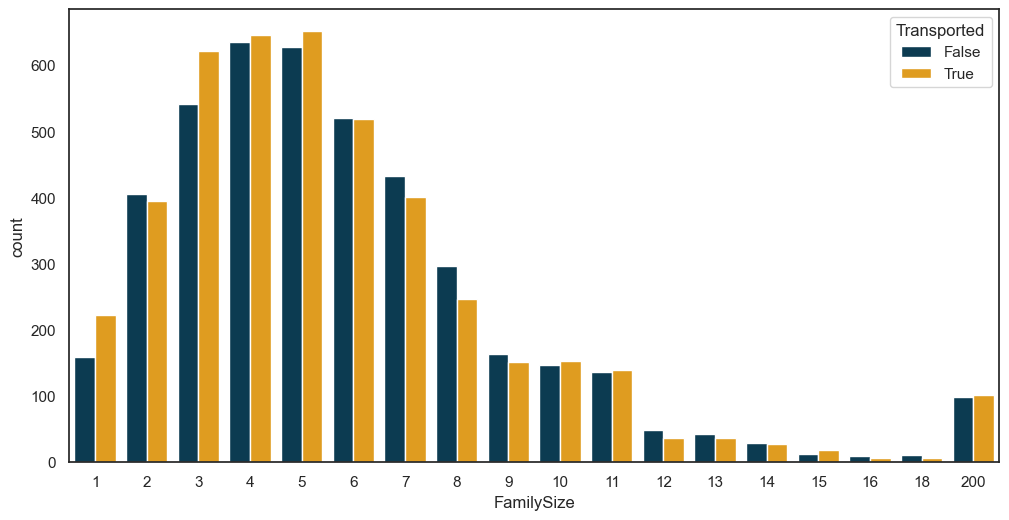

In [41]:
plt.figure(figsize=(12,6), dpi=100)
sns.countplot(data=train, x='FamilySize', hue='Transported', palette=CMAP);

<li>Not too much difference between the transported rates. The 200 at the end are for missing values.</li>

### Home Planet

In [42]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [43]:
train.groupby('HomePlanet')[['LuxurySpend']].describe()

LuxurySpend                                                      \
                 count         mean          std  min  25%     50%     75%   
HomePlanet                                                                   
Earth           4602.0   673.337462   771.307925  0.0  0.0   704.0   888.0   
Europa          2131.0  3451.624589  4845.099433  0.0  0.0  1901.0  5346.0   
Mars            1759.0  1051.256964  1343.371706  0.0  0.0   946.0  1702.5   

                     
                max  
HomePlanet           
Earth        6335.0  
Europa      35987.0  
Mars        10801.0

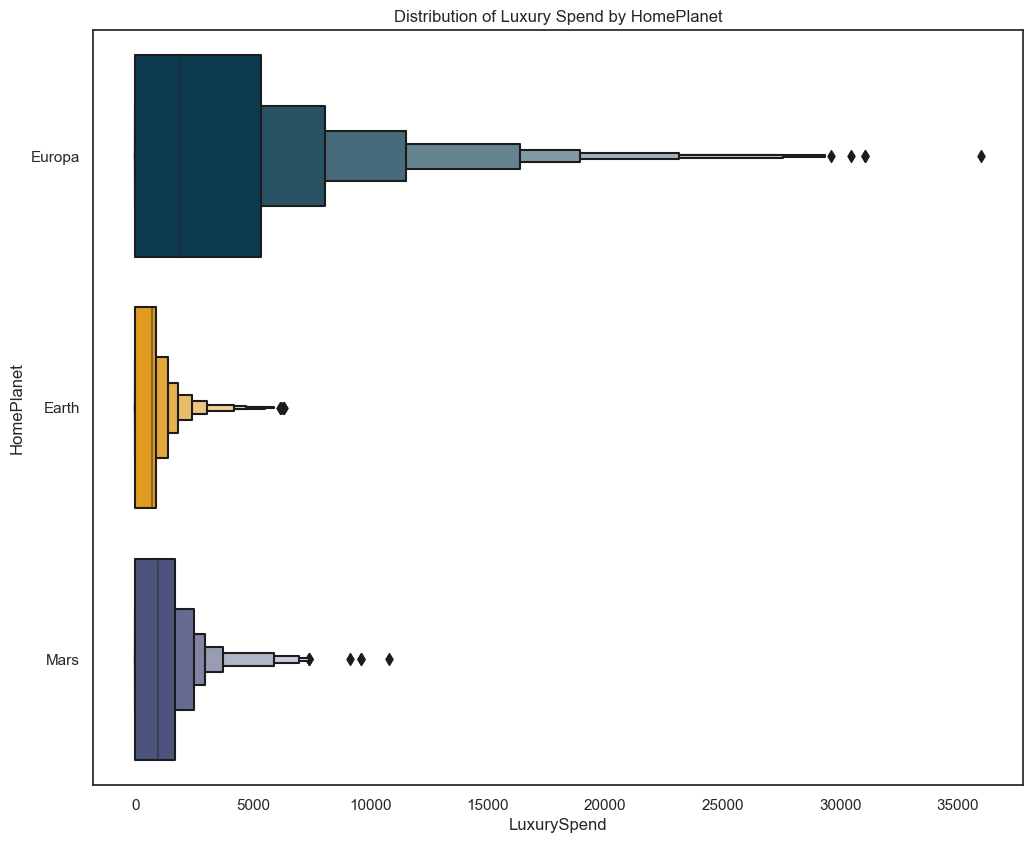

In [44]:
plt.figure(figsize=(12,10), dpi=100)
plt.title('Distribution of Luxury Spend by HomePlanet')
sns.boxenplot(data=train,
            y='HomePlanet',
            x='LuxurySpend',
            palette=CMAP,);

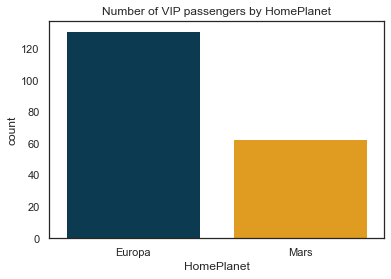

In [45]:
plt.title('Number of VIP passengers by HomePlanet')
sns.countplot(data=train[train.VIP==True], x='HomePlanet', palette=CMAP);

<li>It looks like passengers from Europa have worse luck than the other two, the ratio of Europa's passengers who are transported are higher. </li>
<li>They also happen to be more extravagant on average. The majority of VIP passengers are also from Europa. Interestingly, not a single person from Earth is a VIP passenger. How expensive is the ticket? Surely the Elon Musk/Jeff Bezos of that era could've afforded it.</li>


In [46]:
group_homeplanet = train.groupby(['PassengerGroup', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
group_homeplanet

HomePlanet,Earth,Europa,Mars
PassengerGroup,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
...,...,...,...
9275,0.0,3.0,0.0
9276,0.0,1.0,0.0
9278,1.0,0.0,0.0


In [47]:
(group_homeplanet>0).sum(axis=1).unique()

array([1], dtype=int64)

In [48]:
lastname_homeplanet = train.groupby(['LastName', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
# confirm if same last name come from same planet
(lastname_homeplanet>0).sum(axis=1).unique()

array([1], dtype=int64)

There's only 1 in the unique value there, which means that for any 'PassengerGroup', all of the passengers are from the same 'HomePlanet'. 
Similarly, people with the same last name are also from the same planet. 



<li>Missing HomePlanet can be imputed based on PassengerGroup or their last name.</li>
<li>The remaining missing values, if any, should be imputed based on CabinDeck as we've explored above.</li>
<li>Any more missing values, and we'll impute it with mode (Earth)</li>

### CryoSleep

In [49]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

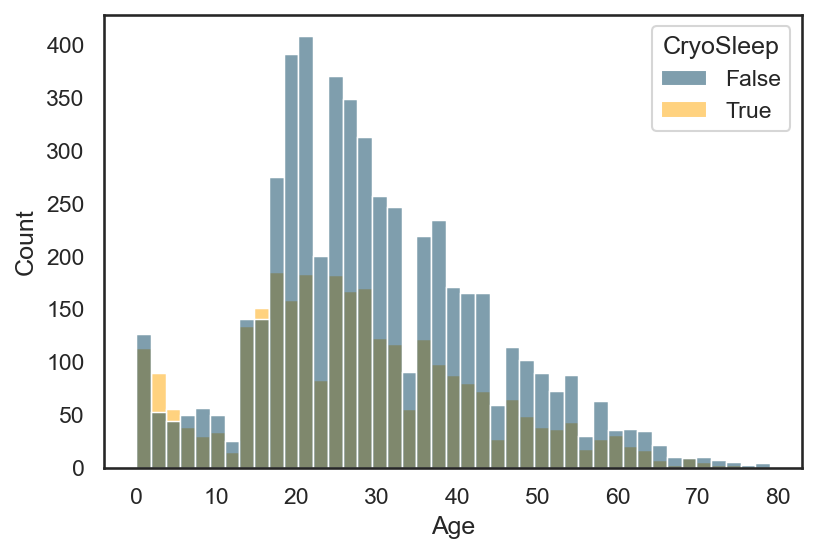

In [50]:
plt.figure(dpi=150)
sns.histplot(data=train, x='Age', hue='CryoSleep', palette=CMAP[0:2]);

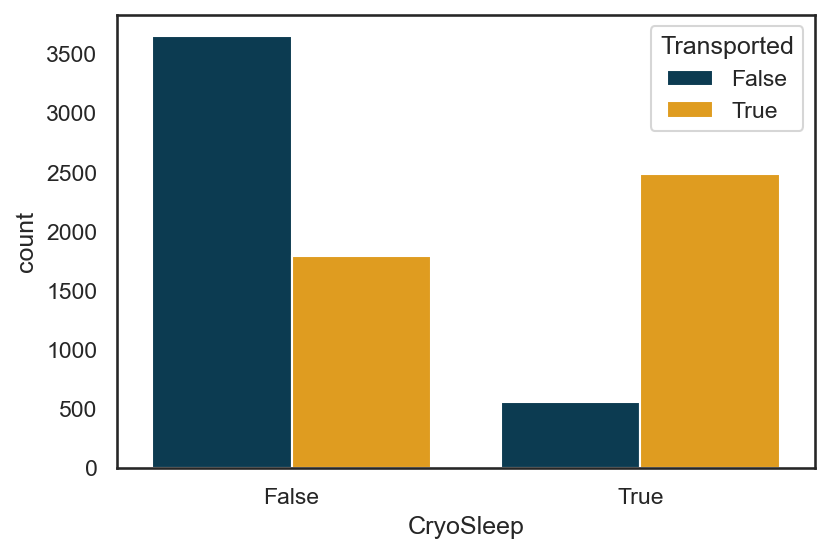

In [51]:
plt.figure(dpi=150)
sns.countplot(data=train, x='CryoSleep', hue='Transported', palette=CMAP);

<li>Passengers that are cryo sleeping are way more likely to be transported than those who are not.</li> 
<li>Those from Earth seems to prefer to be awake. </li>

Pretty hard to say what conditions it would be for someone to choose to cryosleep. We'll go with a simple mode imputation.

### VIP

In [52]:
len(train[train.VIP==True])

199

In [53]:
train[train.VIP.isnull()]['HomePlanet'].value_counts()

Earth     115
Mars       43
Europa     42
Name: HomePlanet, dtype: int64

We don't have many VIP passengers to begin with. Only 199 in total out of 8,000+ passengers. Furthermore, most of the missing values in VIPs are from Earth, which we have seen do not have any representative in the VIP. Therefore, we'll simply impute the null values here with False

#### Destination

In [54]:
train[train.Destination.isnull()]['HomePlanet'].value_counts()

Earth     99
Mars      42
Europa    37
Name: HomePlanet, dtype: int64

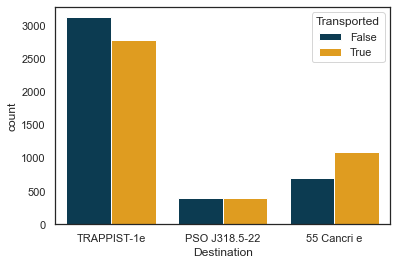

In [55]:
sns.countplot(data=train, x='Destination', hue='Transported', palette=CMAP);

<AxesSubplot:xlabel='Destination', ylabel='count'>

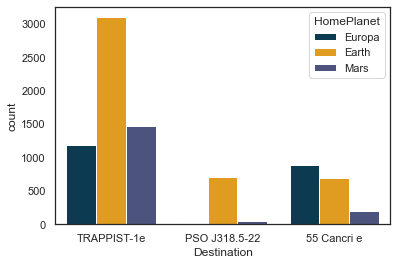

In [56]:
sns.countplot(data=train, x='Destination', hue='HomePlanet', palette=CMAP)

In [57]:
train.groupby('Destination')['HomePlanet'].value_counts()

Destination    HomePlanet
55 Cancri e    Europa         886
               Earth          690
               Mars           193
PSO J318.5-22  Earth          712
               Mars            49
               Europa          19
TRAPPIST-1e    Earth         3101
               Mars          1475
               Europa        1189
Name: HomePlanet, dtype: int64

The vast majority of passengers are heading to TRAPPIST-1e. Again, we'll simply use mode imputation for this column.

## Duplicate

In [58]:
train.duplicated().sum()

0

In [59]:
test.duplicated().sum()

0

<li>The dataset does not have any duplicated rows.</li>

## Impute Missing Values


When I impute the missing values in this section. All of the exploration and decision on values/methods are going to be based on the training data only. Then, I'll repeat the exact same process on the test dataset. By making decision only based on the training set, we minimize 'data leakage' which could potentially invalidate the estimated performance of the model built since we're technically <em>cheating</em> by using information from the test data which should be unseen data.

### Impute Categorical Columns

#### Impute Last Name

c:\Users\61411\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


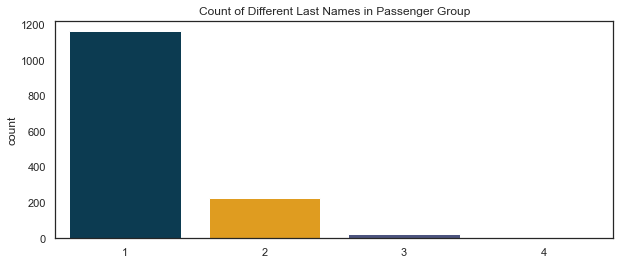

In [60]:
group_lastname = train[train['GroupSize']>1].groupby(['PassengerGroup', 'LastName']).size().unstack().fillna(0)

# plot unique values
plt.figure(figsize=(10,4))
sns.countplot((group_lastname>0).sum(axis=1), palette=CMAP)
plt.title('Count of Different Last Names in Passenger Group');

In [61]:
train[train.LastName.isnull()][['PassengerGroup', 'PassengerGroupNumber', 'GroupSize', 'LastName']].head(20)

,PassengerGroup,PassengerGroupNumber,GroupSize,LastName
27,22,01,1,NaN
58,64,01,2,NaN
65,69,01,1,NaN
77,82,03,3,NaN
101,108,02,3,NaN
126,136,01,1,NaN
165,190,01,1,NaN
297,330,02,3,NaN
305,337,03,3,NaN
331,372,01,1,NaN


Since we are assuming that those within the same groups have the same last name. Let's check a few of the groups that have more than 1 people to confirm the imputation is working as intended.

In [62]:
last_name_check = [82, 108, 753, 770]
train[train.PassengerGroup.isin(last_name_check)][['PassengerGroup', 'GroupSize', 'LastName']]

,PassengerGroup,GroupSize,LastName
75,82,3,Datte
76,82,3,Datte
77,82,3,NaN
100,108,3,Handertiz
101,108,3,NaN
102,108,3,Handertiz
711,753,3,Ennalve
712,753,3,NaN
713,753,3,Ennalve
728,770,6,Mclardson


In [63]:
# fill missing last name with respect to passenger group
func = lambda x: x.mode()[0] if x.notna().any() else np.nan
train['LastName'] = train.groupby(['PassengerGroup'])['LastName'].transform(func)

train.LastName.isna().sum()

104

In [64]:
# recount family size
counter = np.vectorize(Counter(train['LastName']).get)
train['FamilySize'] = counter(train['LastName'])

# check if the remaining missing last names are alone
train[train.LastName.isna()]['Alone'].unique()

array([ True])

In [65]:
# yes they are! change family size to 1
train.loc[train['FamilySize']>100, 'FamilySize'] = 1

In [66]:
train[train.PassengerGroup.isin(last_name_check)][['PassengerGroup', 'GroupSize', 'LastName']]

,PassengerGroup,GroupSize,LastName
75,82,3,Datte
76,82,3,Datte
77,82,3,Datte
100,108,3,Handertiz
101,108,3,Handertiz
102,108,3,Handertiz
711,753,3,Ennalve
712,753,3,Ennalve
713,753,3,Ennalve
728,770,6,Mclardson


In [67]:
# repeat for test set
test['LastName'] = test.groupby(['PassengerGroup'])['LastName'].transform(func)

counter = np.vectorize(Counter(test['LastName']).get)
test['FamilySize'] = counter(test['LastName'])

test.loc[test['FamilySize']>100, 'FamilySize'] = 1

#### Impute HomePlanet

We established some patterns that we'd like to use to impute this column earlier.
<li>If they have the same last name, they are from the same HomePlanet. </li>
<li>If they are from Cabin Deck G, they are from Earth.</li>
<li>If they are from Cabin Deck A, B, C, or T, they are from Europa.</li>
<li>If their total spending is more than 6400 (max for Earth passenger), they are from Europa.</li>
<li>Anymore missing values, we fill it with Earth (the mode).</li>

In [68]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [69]:
train.HomePlanet.isna().sum()

201

In [70]:
# fill missing homeplanet with respect to last name
train['HomePlanet'] = train.groupby(['LastName'])['HomePlanet'].transform(func)

# fill missing values with respect to cabin deck
train.loc[(train.CabinDeck=='G')&(train.HomePlanet.isna()), 'HomePlanet'] = 'Earth'
train.loc[(train.CabinDeck.isin(['A','B','C','T']))&(train.HomePlanet.isna()), 'HomePlanet']='Europa'

# fill missing values with respect to spending
train.loc[(train.LuxurySpend>6400)&(train.HomePlanet.isna()), 'HomePlanet']='Europa'

# fill the rest with mode (Earth)
train['HomePlanet'] = train['HomePlanet'].fillna('Earth')

In [71]:
train.HomePlanet.isna().sum()

0

In [72]:
# test set
# fill missing homeplanet with respect to last name
test['HomePlanet'] = test.groupby(['LastName'])['HomePlanet'].transform(func)

# fill missing values with respect to cabin deck
test.loc[(test.CabinDeck=='G')&(test.HomePlanet.isna()), 'HomePlanet'] = 'Earth'
test.loc[(test.CabinDeck.isin(['A','B','C','T']))&(test.HomePlanet.isna()), 'HomePlanet']='Europa'

# fill missing values with respect to spending
test.loc[(train.LuxurySpend>6400)&(test.HomePlanet.isna()), 'HomePlanet']='Europa'

# fill the rest with mode (Earth)
test['HomePlanet'] = test['HomePlanet'].fillna('Earth')

In [73]:
test.HomePlanet.isna().sum()

0

Okay, HomePlanet is now free of NAN values. 

#### The Cabins

We can use the passenger group somebody is in to impute their cabin details. They're most likely in the same cabin.

c:\Users\61411\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


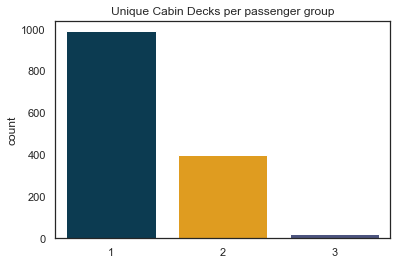

In [74]:
group_cabindeck = train[train['GroupSize']>1].groupby(['PassengerGroup', 'CabinDeck'])['CabinDeck'].size().unstack().fillna(0)

plt.title('Unique Cabin Decks per passenger group')
sns.countplot((group_cabindeck>0).sum(axis=1), palette=CMAP);

c:\Users\61411\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


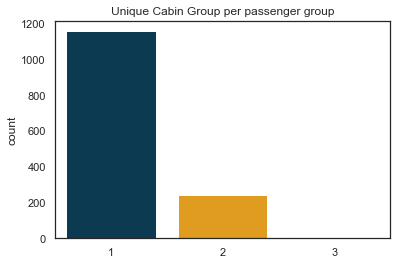

In [75]:
group_cabingroup = train[train['GroupSize']>1].groupby(['PassengerGroup', 'CabinGroup'])['CabinGroup'].size().unstack().fillna(0)

plt.title('Unique Cabin Group per passenger group')
sns.countplot((group_cabingroup>0).sum(axis=1), palette=CMAP);

c:\Users\61411\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


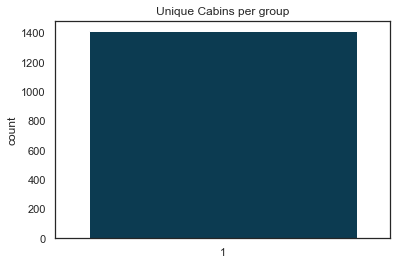

In [76]:
group_cabinside = train[train['GroupSize']>1].groupby(['PassengerGroup', 'CabinSide'])['CabinSide'].size().unstack().fillna(0)

plt.title('Unique Cabins per group')
sns.countplot((group_cabinside>0).sum(axis=1), palette=CMAP);

#### Impute Cabin Side

We know that for any given passenger group, everyone in the group is in the same cabin side.

In [77]:
train.CabinSide.value_counts()

S    4288
P    4206
Name: CabinSide, dtype: int64

In [78]:
train.CabinSide.isna().sum()

199

In [79]:
# fill missing side with respect to passenger group
train['CabinSide'] = train.groupby(['PassengerGroup'])['CabinSide'].transform(func)

test['CabinSide'] = test.groupby(['PassengerGroup'])['CabinSide'].transform(func)

In [80]:
train.CabinSide.value_counts()

S    4343
P    4251
Name: CabinSide, dtype: int64

In [81]:
train.CabinSide.isna().sum()

99

There is really not much else to separate whether somebody is in the Starboard or the Portside. It's pretty balanced. We could try to impute it randomly to preserve the ratio. 

In [82]:
import random
random.seed(42)

sides = ['S', 'P']
train.loc[train.CabinSide.isna(), 'CabinSide'] = [random.choice(sides) for missing_value in train.loc[train.CabinSide.isna(), 'CabinSide']]

test.loc[test.CabinSide.isna(), 'CabinSide'] = [random.choice(sides) for missing_value in test.loc[test.CabinSide.isna(), 'CabinSide']]

In [83]:
train.CabinSide.value_counts()

S    4399
P    4294
Name: CabinSide, dtype: int64

In [84]:
train.CabinSide.isna().sum()

0

#### Impute Cabin Deck

<li>If they are from Earth: Cabin G</li>
<li>If they are from Mars: Cabin F</li>
<li>If they are from Europa: Cabin B</li>

In [85]:
train.loc[(train.CabinDeck.isna())&(train.HomePlanet=='Earth'), 'CabinDeck'] = 'G'
train.loc[(train.CabinDeck.isna())&(train.HomePlanet=='Mars'), 'CabinDeck'] = 'F'
train.loc[(train.CabinDeck.isna())&(train.HomePlanet=='Europa'), 'CabinDeck'] = 'B'

test.loc[(test.CabinDeck.isna())&(test.HomePlanet=='Earth'), 'CabinDeck'] = 'G'
test.loc[(test.CabinDeck.isna())&(test.HomePlanet=='Mars'), 'CabinDeck'] = 'F'
test.loc[(test.CabinDeck.isna())&(test.HomePlanet=='Europa'), 'CabinDeck'] = 'B'

In [86]:
train.CabinDeck.isna().sum()

0

#### Impute Cabin Group

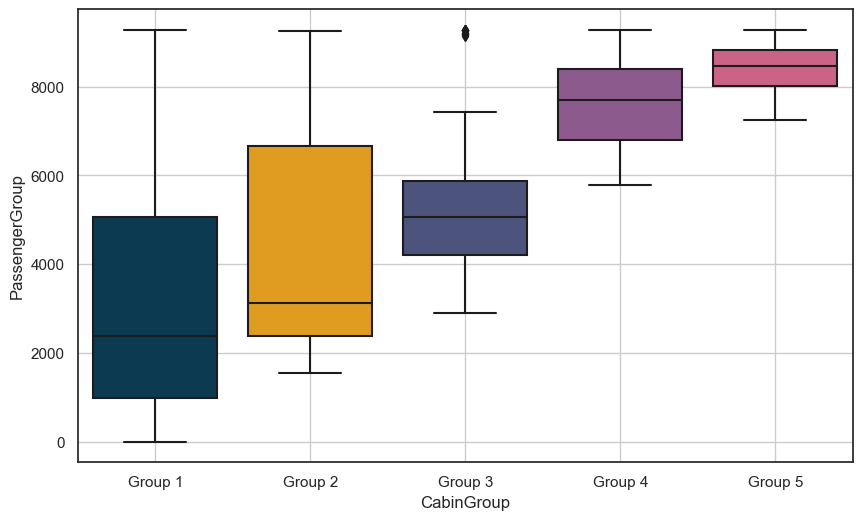

In [87]:
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(data=train, x='CabinGroup', y='PassengerGroup', palette=CMAP)
plt.grid()

Alright, we see a clear pattern here in the assignment of passenger group number and their respective cabin number, which has been made into this new feature, CabinGroup.

We could impute it in this way:
<li>PassengerGroup < 2000 is Group 1</li>
<li>PassengerGroup between 2000 and 4000 is Group 2</li>
<li>PassengerGroup between 4000 and 6000 is Group 3</li>
<li>PassengerGroup between 6000 and 8000 is Group 4</li>
<li>PassengerGroup > 8000 is Group 5</li>


In [88]:
train.loc[(train.CabinGroup.isna())&(train.PassengerGroup <=2000), 'CabinGroup'] = 'Group 1'
train.loc[(train.CabinGroup.isna())&(train.PassengerGroup <=4000), 'CabinGroup'] = 'Group 2'
train.loc[(train.CabinGroup.isna())&(train.PassengerGroup <=6000), 'CabinGroup'] = 'Group 3'
train.loc[(train.CabinGroup.isna())&(train.PassengerGroup <=8000), 'CabinGroup'] = 'Group 4'
train['CabinGroup'] = train['CabinGroup'].fillna('Group 5')

test.loc[(test.CabinGroup.isna())&(test.PassengerGroup <=2000), 'CabinGroup'] = 'Group 1'
test.loc[(test.CabinGroup.isna())&(test.PassengerGroup <=4000), 'CabinGroup'] = 'Group 2'
test.loc[(test.CabinGroup.isna())&(test.PassengerGroup <=6000), 'CabinGroup'] = 'Group 3'
test.loc[(test.CabinGroup.isna())&(test.PassengerGroup <=8000), 'CabinGroup'] = 'Group 4'
test['CabinGroup'] = test['CabinGroup'].fillna('Group 5')


In [89]:
train.CabinGroup.isna().sum()

0

In [90]:
test.CabinGroup.isna().sum()

0

All the cabin related columns have no more missing values. 

#### Impute CryoSleep, Destination, and VIP

These columns are more straightforward, we simply impute them with their mode.

In [91]:
train['CryoSleep'] = train['CryoSleep'].fillna(train.CryoSleep.mode()[0])
train['Destination'] = train['Destination'].fillna(train.Destination.mode()[0])
train['VIP'] = train['VIP'].fillna(train.VIP.mode()[0])

test['CryoSleep'] = test['CryoSleep'].fillna(False)
test['Destination'] = test['Destination'].fillna('TRAPPIST-1e')
test['VIP'] = test['VIP'].fillna(False)

Drop Cabin, CabinNum, Name, and LastName

In [92]:
train = train.drop(['Cabin', 'CabinNum', 'Name', 'LastName'], axis=1)

test = test.drop(['Cabin', 'CabinNum', 'Name', 'LastName'], axis=1)

### Impute Numerical Columns

#### Impute Age

We can impute Age with the median but maybe there's some differences if we look at subgroups such as HomePlanet, Alone, and etc.

In [93]:
train.groupby('HomePlanet')['Age'].median()

HomePlanet
Earth     23.0
Europa    33.0
Mars      28.0
Name: Age, dtype: float64

In [94]:
train.groupby('Alone')['Age'].median()

Alone
False    26.0
True     28.0
Name: Age, dtype: float64

In [95]:
train.groupby(['HomePlanet', 'ZeroSpend', 'Alone'])['Age'].median().unstack()

Alone                 False  True
HomePlanet ZeroSpend             
Earth      False       26.0  25.0
           True         8.0  23.0
Europa     False       33.0  36.0
           True        28.0  33.0
Mars       False       29.0  31.0
           True        20.0  29.0

<li>People who are alone tend to be older.</li>
<li>Those who spend some money also tend to be older.</li>
<li>Passengers from Earth are younger than the others.</li>

In [96]:
# fill Age with medians of subgroups
train['Age'] = train.groupby(['HomePlanet', 'ZeroSpend', 'Alone'])['Age'].transform(lambda x: x.fillna(x.median()))

test['Age'] = test.groupby(['HomePlanet', 'ZeroSpend', 'Alone'])['Age'].transform(lambda x: x.fillna(x.median()))

#### Impute Luxury Spending Columns

In [97]:
luxury_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in luxury_cols:
    train[col] = train[col].fillna(train[col].median())
    print(f"The median of {col} is {train[col].median()} ")

The median of RoomService is 0.0 
The median of FoodCourt is 0.0 
The median of ShoppingMall is 0.0 
The median of Spa is 0.0 
The median of VRDeck is 0.0 


In [98]:
for col in luxury_cols:
    test[col] = test[col].fillna(0)

In [99]:
train.isnull().sum()

PassengerId             0
HomePlanet              0
CryoSleep               0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Transported             0
LuxurySpend             0
ZeroSpend               0
PassengerGroup          0
PassengerGroupNumber    0
GroupSize               0
Alone                   0
CabinDeck               0
CabinSide               0
CabinGroup              0
FamilySize              0
dtype: int64

In [100]:
test.isnull().sum()

PassengerId             0
HomePlanet              0
CryoSleep               0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
LuxurySpend             0
ZeroSpend               0
PassengerGroup          0
PassengerGroupNumber    0
GroupSize               0
Alone                   0
CabinDeck               0
CabinSide               0
CabinGroup              0
FamilySize              0
dtype: int64

No more missing values! Drop PassengerGroup and PassengerGroupNumber as they are no longer needed.

In [101]:
train.drop(['PassengerGroup', 'PassengerGroupNumber'], axis=1, inplace=True)
test.drop(['PassengerGroup', 'PassengerGroupNumber'], axis=1, inplace=True)

In [102]:
train.to_csv('../data/clean_train.csv', index=False)
test.to_csv('../data/clean_test.csv', index=False)

In [103]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'LuxurySpend', 'ZeroSpend', 'GroupSize', 'Alone',
       'CabinDeck', 'CabinSide', 'CabinGroup', 'FamilySize'],
      dtype='object')